In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_csv("C:/Users/panka/Downloads/crash_Reporting_-_Drivers_Data.csv")#enter your file path

# Basic overview
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSample data:\n", df.head())

C:\Users\panka\AppData\Local\Temp\ipykernel_29716\3879054959.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/panka/Downloads/crash_Reporting_-_Drivers_Data.csv")#enter your file path


Shape: (195092, 39)

Columns: ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location']

Data Types:
 Report Number                     object
Local Case Number                 object
Agency Name                       object
ACRS Report Type                  object
Crash Date/Time                   object
Route Type         

In [3]:
df = df.dropna(subset=['Driver At Fault'])
df.fillna(value={'Weather': 'Unknown'}, inplace=True)


In [4]:
# Summary stats
print(df.describe(include='all'))

# Unique values
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")

       Report Number Local Case Number               Agency Name  \
count         195092            195092                    195092   
unique        109888            121821                        10   
top      MCP229800RC         200022715  Montgomery County Police   
freq              10                10                    138376   
mean             NaN               NaN                       NaN   
std              NaN               NaN                       NaN   
min              NaN               NaN                       NaN   
25%              NaN               NaN                       NaN   
50%              NaN               NaN                       NaN   
75%              NaN               NaN                       NaN   
max              NaN               NaN                       NaN   

             ACRS Report Type         Crash Date/Time        Route Type  \
count                  195092                  195092            176046   
unique                      3    

In [5]:
print(df['Driver Distracted By'].value_counts().head(10))
print(df['Vehicle Body Type'].value_counts().head(5))


Driver Distracted By
NOT DISTRACTED                                  106718
UNKNOWN                                          32803
LOOKED BUT DID NOT SEE                           21546
Not Distracted                                   15241
Unknown                                           5402
INATTENTIVE OR LOST IN THOUGHT                    4320
OTHER DISTRACTION                                 3245
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT       970
Other Action (looking away from task, etc.)        690
BY OTHER OCCUPANTS                                 418
Name: count, dtype: int64
Vehicle Body Type
PASSENGER CAR              119109
(SPORT) UTILITY VEHICLE     15990
Passenger Car               14750
PICKUP TRUCK                 6787
VAN                          4958
Name: count, dtype: int64


C:\Users\panka\AppData\Local\Temp\ipykernel_29716\3057503951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


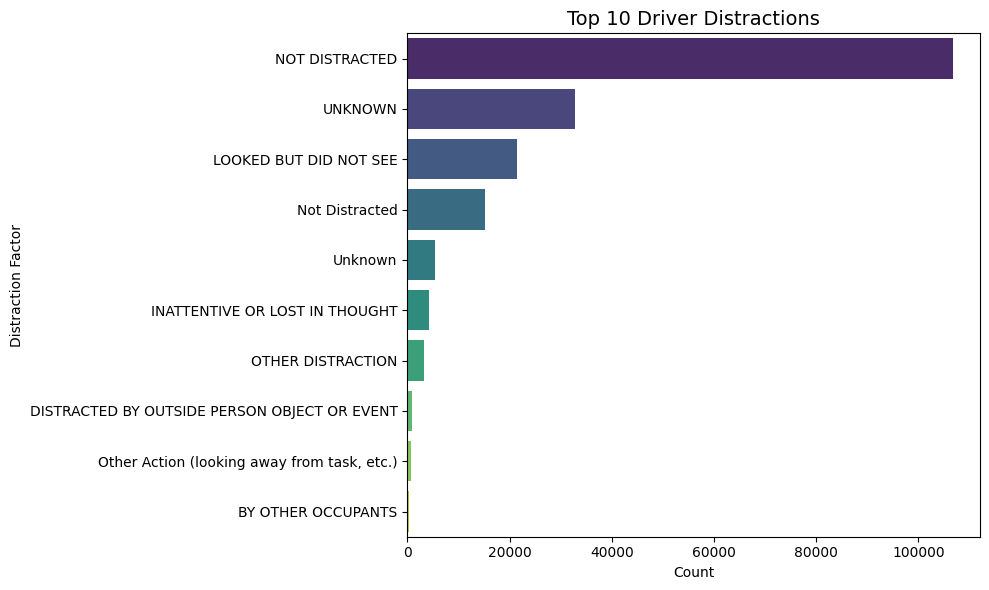

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    y='Driver Distracted By',
    order=df['Driver Distracted By'].value_counts().head(10).index,
    palette='viridis'
)
plt.title('Top 10 Driver Distractions', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Distraction Factor')
plt.tight_layout()
plt.show()


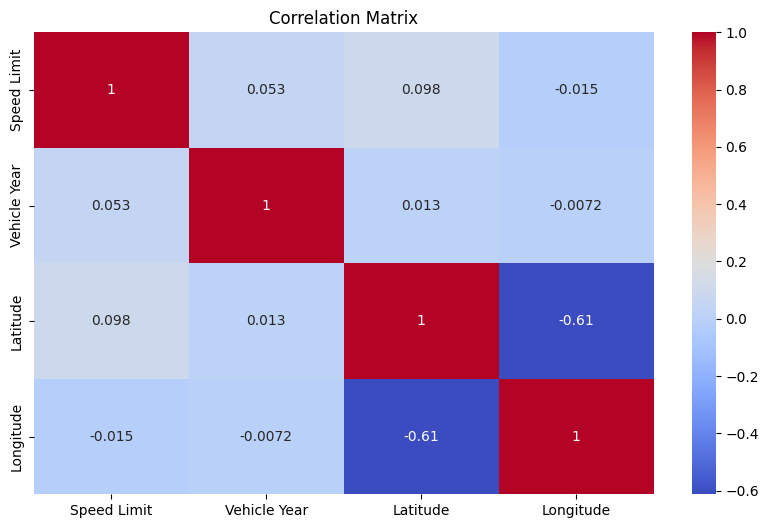

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
if 'Driver Age' in df.columns:
    sns.histplot(df['Driver Age'], bins=30, kde=True)
    plt.title('Driver Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Driver Age' not found in the dataset.")


Column 'Driver Age' not found in the dataset.


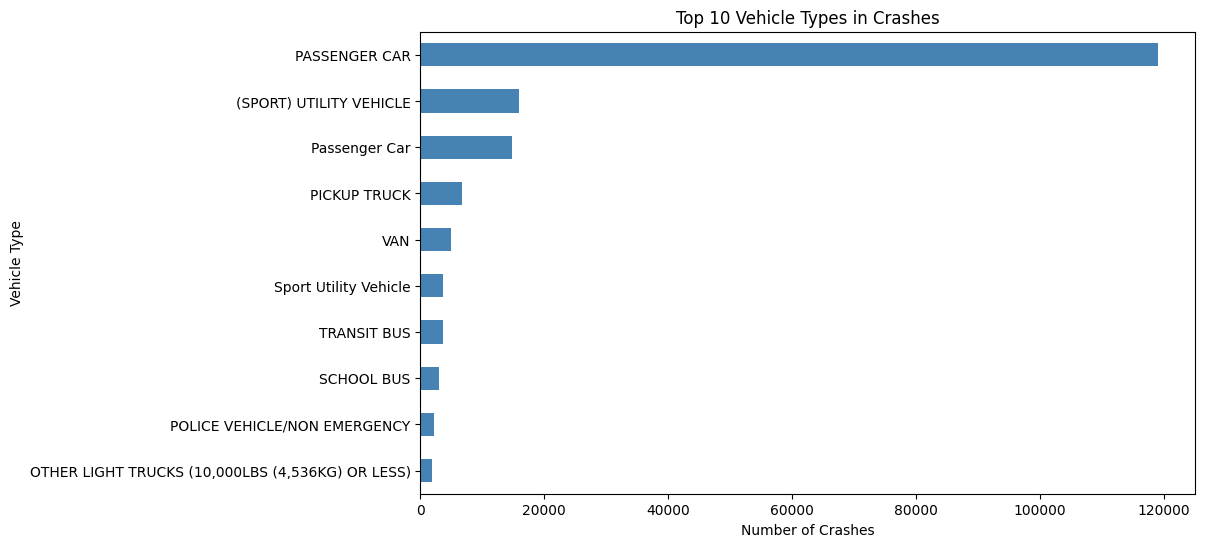

In [19]:
plt.figure(figsize=(10, 6))
df['Vehicle Body Type'].value_counts().head(10).plot(kind='barh', color='steelblue')
plt.title('Top 10 Vehicle Types in Crashes')
plt.xlabel('Number of Crashes')
plt.ylabel('Vehicle Type')
plt.gca().invert_yaxis()
plt.show()

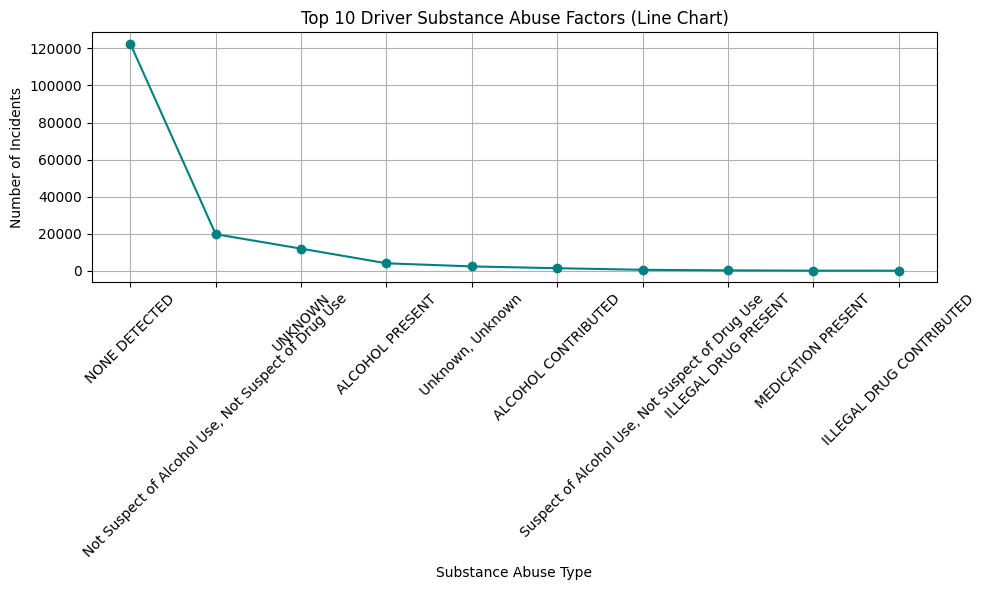

In [23]:
import matplotlib.pyplot as plt
top_10 = df['Driver Substance Abuse'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.plot(top_10.index, top_10.values, marker='o', linestyle='-', color='teal')
plt.title('Top 10 Driver Substance Abuse Factors (Line Chart)')
plt.xlabel('Substance Abuse Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
